<a href="https://colab.research.google.com/github/willynganga/Colab/blob/master/SentimentAnalysisColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: A sentiment Analysis Program tha parses the tweets fetched from Twitter using Python

In [0]:
# Import Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving twitter_credentials.py to twitter_credentials.py


In [0]:
# Get the Twitter Credentials
import twitter_credentials

In [0]:
# Access the credentials
consumerKey = twitter_credentials.CONSUMER_KEY
consumerSecret = twitter_credentials.CONSUMER_SECRET
accessToken = twitter_credentials.ACCESS_TOKEN
acccessTokenSecret = twitter_credentials.ACCESS_TOKEN_SECRET

In [0]:
# Create the auth object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and acess token secret
auth.set_access_token(accessToken, acccessTokenSecret)

# Create the API object while passing the auth object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
# Extract tweets from the twitter user
tweets = api.user_timeline(screen_name="realDonaldTrump", count=100, lang="en", tweet_mode="extended")

# print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in tweets[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1).@CNN &amp; MSDNC are doing everything possible to “inflame” the crowd. Fortunately they have a very small audience!

2)Much smaller crowd in D.C. than anticipated. National Guard, Secret Service, and D.C. Police have been doing a fantastic job. Thank you!

3)LAW &amp; ORDER!

4)Wow! 96% Approval Rating in the Republican Party (and I believe this was before the “GREAT” Jobs Numbers yesterday). Thank you!

5)https://t.co/hJSsx86Azp



In [15]:
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,.@CNN &amp; MSDNC are doing everything possibl...
1,Much smaller crowd in D.C. than anticipated. N...
2,LAW &amp; ORDER!
3,Wow! 96% Approval Rating in the Republican Par...
4,https://t.co/hJSsx86Azp


In [16]:
# Clean the tweet

# Create a fun to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z-0-9]+', '', text) # Removed @mentions
  text = re.sub(r'#', '', text) # Removed '#' symbol
  text = re.sub(r'RT', '', text) # Removed RT 
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyper link

  return text

df['Tweets'] = df['Tweets'].apply(cleanText)

# Show Cleaned text
df

,Tweets
0,. &amp; MSDNC are doing everything possible to...
1,Much smaller crowd in D.C. than anticipated. N...
2,LAW &amp; ORDER!
3,Wow! 96% Approval Rating in the Republican Par...
4,
...,...
95,": I led a letter to w/ Sens Grassley, Crapo,..."
96,": In particular, I’m pleased the administrati..."
97,: The president should use the Insurrection A...
98,": We should have zero tolerance for anarchy, ..."


In [17]:
# Create a funtion to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns 
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with new columns
df

,Tweets,subjectivity,polarity
0,. &amp; MSDNC are doing everything possible to...,0.740000,-0.002083
1,Much smaller crowd in D.C. than anticipated. N...,0.700000,0.033333
2,LAW &amp; ORDER!,0.000000,0.000000
3,Wow! 96% Approval Rating in the Republican Par...,0.875000,0.562500
4,,0.000000,0.000000
...,...,...,...
95,": I led a letter to w/ Sens Grassley, Crapo,...",0.000000,0.000000
96,": In particular, I’m pleased the administrati...",0.577778,0.222222
97,: The president should use the Insurrection A...,0.050000,-0.050000
98,": We should have zero tolerance for anarchy, ...",1.000000,0.000000


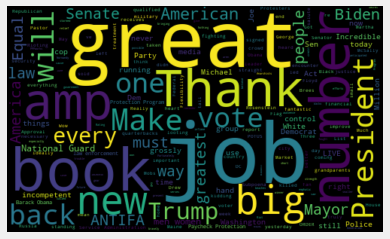

In [21]:
# Plot Word Cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['polarity'].apply(getAnalysis)

# SHow the dataframe
df

,Tweets,subjectivity,polarity,Analysis
0,. &amp; MSDNC are doing everything possible to...,0.740000,-0.002083,Negative
1,Much smaller crowd in D.C. than anticipated. N...,0.700000,0.033333,Positive
2,LAW &amp; ORDER!,0.000000,0.000000,Neutral
3,Wow! 96% Approval Rating in the Republican Par...,0.875000,0.562500,Positive
4,,0.000000,0.000000,Neutral
...,...,...,...,...
95,": I led a letter to w/ Sens Grassley, Crapo,...",0.000000,0.000000,Neutral
96,": In particular, I’m pleased the administrati...",0.577778,0.222222,Positive
97,: The president should use the Insurrection A...,0.050000,-0.050000,Negative
98,": We should have zero tolerance for anarchy, ...",1.000000,0.000000,Neutral


In [25]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + sortedDF['Tweets'][i])
    print()
    j = j + 1

1Much smaller crowd in D.C. than anticipated. National Guard, Secret Service, and D.C. Police have been doing a fantastic job. Thank you!

2Wow! 96% Approval Rating in the Republican Party (and I believe this was before the “GREAT” Jobs Numbers yesterday). Thank you!

3 : . is grossly incompetent, and in no way qualified to be running an important city like Washington, D.C. If…

4 : I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back h…

5 : ...We should be standing up straight and tall, ideally with a salute, or a hand on heart. There are other things you c…

6 : On June 6, 1944, our Greatest Generation bravely stormed the beaches of Normandy.

"Those who fought here won a future for…

7Riot gear or military control is not necessary because ANTIFA &amp; other Wacko groups of Anarchists aren’t present to cause trouble. Incredible people. Thank you Maine! 

8Great new book by  called “Nothing to Lose”. The Pastor is a winn

In [28]:
 # Print negative tweets
 j = 1
 sortedDF = df.sort_values(by=['polarity'], ascending=False)
 for i in range(0, sortedDF.shape[0]):
   if (sortedDF['Analysis'][i] == 'Negative'):
     print(str(j) + ')' + sortedDF['Tweets'][i])
     print()
     j = j + 1

1). &amp; MSDNC are doing everything possible to “inflame” the crowd. Fortunately they have a very small audience!

2)“This is a flat out lie. They (the media) are making things up”    The Lamestream Media is out of control. It would be impossible to fully explain how dishonest they are!

3)Crazy! 

4) : .: Democrats Are 'Frantic' That The Black Vote Is Leaving Their Party 

"They try to do everything they can…

5) : NYC Construction Workers Use Excavator to Save Gucci Handbags, Other Valuable Items From Looters 

6) : CA Socialist/Dem party cutting basic services like police/fire/teachers so they can continue funding boondoggles like this…

7) : I don't care WHAT George Floyd did. The officer should have never treated him like that and killed him! But we still must as…

8) : Lunatics are running the insane asylum...


9)Twitter Pulls Trump Campaign Video of President Showing Empathy For Peaceful Protesters   They are fighting hard for the Radical Left Democrats. A one sided battle. Il

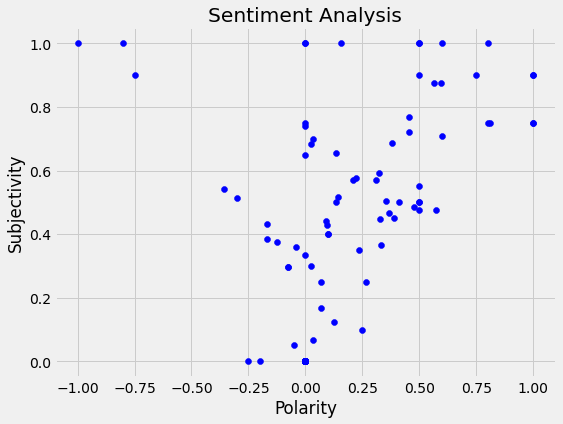

In [29]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color="Blue")

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0] / df.shape[0] * 100, 1)

52.0

In [33]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(ntweets.shape[0] / df.shape[0] * 100, 1)

15.0

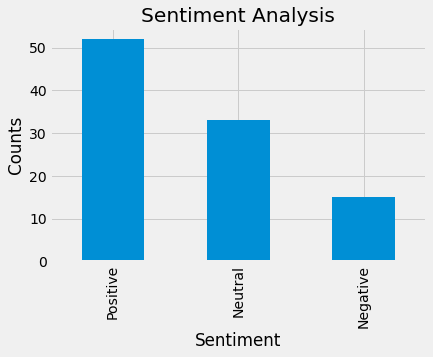

In [36]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

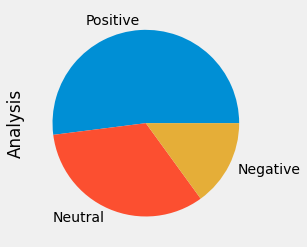

In [52]:
# Show a pie chart representing the +ve, -ve, and neutral tweets
nntweets = df[df.Analysis == 'Neutral']
nntweets = nntweets['Tweets']

positive = format(ptweets.shape[0] / df.shape[0] * 100, '.2f')
negative = format(ntweets.shape[0] / df.shape[0] * 100, '.2f')
neutral = format(nntweets.shape[0] / df.shape[0] * 100, '.2f')

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]

df['Analysis'].value_counts().plot(kind='pie')
plt.show()